In [1]:
## incident wave propagating forward (+z direction)

from sympy import symbols, exp, I, latex, Matrix, solve, sqrt, cos, sin, eye
from IPython.display import display, Math
from Electromagnetics import Misc

print_latex = True

z, t = symbols('z, t')
omega_i, omega_r, omega_t = symbols(r'\omega_i \omega_r \omega_t')
k_i, k_r, k_t = symbols(r'k_i k_r k_t')
eps_1, eps_2 = symbols(r'\epsilon_1 \epsilon_2', real=True, positive=True)
mu_1, mu_2 = symbols(r'\mu_1 \mu_2', real=True, positive=True)
c_1, c_2 = symbols(r'c_1 c_2')
n_1, n_2 = symbols(r'n_1 n_2')
eta_1, eta_2 = symbols(r'\eta_1 \eta_2')
T, R = symbols(r'T R')
v = symbols('v')

E_i, E_r, E_t = symbols('E_i E_r E_t')
H_i, H_r, H_t = symbols('H_i H_r H_t')

E_I = E_i*exp(I*omega_i*t - I*k_i*z)
H_I = H_i*exp(I*omega_i*t - I*k_i*z)
E_R =  E_r*exp(-I*omega_r*t - I*k_r*z)
H_R = -H_r*exp(-I*omega_r*t - I*k_r*z)
E_T = E_t*exp(I*omega_t*t - I*k_t*z)
H_T = H_t*exp(I*omega_t*t - I*k_t*z)

display(Math("E_I = "+ latex(E_I)))
display(Math("H_I = "+ latex(H_I)))
display(Math("E_R = "+ latex(E_R)))
display(Math("H_R = "+ latex(H_R)))
display(Math("E_T = "+ latex(E_T)))
display(Math("H_T = "+ latex(H_T)))

## Half space moving at velocity -v
## Boundary conditions: continuity of D+H/v and B+E/v

eq_1 = eps_1*E_I+H_I/v - ( eps_2*(E_R+E_T)+(H_R+H_T)/v )
eq_2 = mu_1*H_I+E_I/v - ( mu_2*(H_R+H_T)+(E_R+E_T)/v )

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs([(omega_i, k_i*c_1), (omega_r, k_r*c_2),(omega_t, k_t*c_2)])
eq_2 = eq_2.subs([(omega_i, k_i*c_1), (omega_r, k_r*c_2),(omega_t, k_t*c_2)])

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs(t, -z/v)
eq_2 = eq_2.subs(t, -z/v)

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_kt = (1+c_2/v)*k_t - (1+c_1/v)*k_i
eq_kr = (1-c_2/v)*k_r - (1+c_1/v)*k_i
k_t_res = solve(eq_kt, k_t)[0]
k_r_res = solve(eq_kr, k_r)[0]
display(Math("k_t = "+ latex(k_t_res)))
display(Math("k_r = "+ latex(k_r_res)))


eq_1 = eq_1.subs(z, 0)
eq_2 = eq_2.subs(z, 0)

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs([(H_i, E_i/eta_1), (H_r, E_r/eta_2), (H_t, E_t/eta_2)])
eq_2 = eq_2.subs([(H_i, E_i/eta_1), (H_r, E_r/eta_2), (H_t, E_t/eta_2)])

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eqs_mat = Matrix([eq_1, eq_2]).subs([(E_t, T), (E_r, R), (E_i, 1)])
eq_rhs = -eqs_mat.subs([(T, 0), (R, 0)])
eq_coeffs = eqs_mat + eq_rhs


display(Math(r"\text{coeff-eqs} : " + latex(eq_coeffs)))
display(Math("rhs : " + latex(eq_rhs)))

coeffs = Misc.SymEqSysLinearToMat(eq_coeffs, [T, R])
display(Math("coeff: "+latex(coeffs)))

TR = solve(eqs_mat, [T, R])
display(Math("TR: "+latex(TR)))

T_res = TR[T].subs([(eta_1, 1/n_1), (eta_2, 1/n_2), (eps_1, n_1**2), (eps_2, n_2**2), (mu_1, 1), (mu_2, 1)]).simplify()
R_res = TR[R].subs([(eta_1, 1/n_1), (eta_2, 1/n_2), (eps_1, n_1**2), (eps_2, n_2**2), (mu_1, 1), (mu_2, 1)]).simplify()

display(Math("T : "+latex(T_res)))
display(Math("R : "+latex(R_res)))

Gamma_pp = T_res
Gamma_mp = R_res

k_pp = k_t_res
k_mp = k_r_res


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
## incident wave propagating backward (-z direction using -omega)

from sympy import symbols, exp, I, latex, Matrix, solve, sqrt
from IPython.display import display, Math
from Electromagnetics import Misc

z, t = symbols('z, t')
omega_i, omega_r, omega_t = symbols(r'\omega_i \omega_r \omega_t')
k_i, k_r, k_t = symbols(r'k_i k_r k_t')
eps_1, eps_2 = symbols(r'\epsilon_1 \epsilon_2', real=True, positive=True)
mu_1, mu_2 = symbols(r'\mu_1 \mu_2', real=True, positive=True)
c_1, c_2 = symbols(r'c_1 c_2')
n_1, n_2 = symbols(r'n_1 n_2')
eta_1, eta_2 = symbols(r'\eta_1 \eta_2')
T, R = symbols(r'T R')
v = symbols('v')

E_i, E_r, E_t = symbols('E_i E_r E_t')
H_i, H_r, H_t = symbols('H_i H_r H_t')

E_I = E_i*exp(-I*omega_i*t - I*k_i*z)
H_I = -H_i*exp(-I*omega_i*t - I*k_i*z)
E_R =  E_r*exp(-I*omega_r*t - I*k_r*z)
H_R = -H_r*exp(-I*omega_r*t - I*k_r*z)
E_T = E_t*exp(I*omega_t*t - I*k_t*z)
H_T = H_t*exp(I*omega_t*t - I*k_t*z)

display(Math("E_I = "+ latex(E_I)))
display(Math("H_I = "+ latex(H_I)))
display(Math("E_R = "+ latex(E_R)))
display(Math("H_R = "+ latex(H_R)))
display(Math("E_T = "+ latex(E_T)))
display(Math("H_T = "+ latex(H_T)))

## Half space moving at velocity -v
## Boundary conditions: continuity of D+H/v and B+E/v

eq_1 = eps_1*E_I+H_I/v - ( eps_2*(E_R+E_T)+(H_R+H_T)/v )
eq_2 = mu_1*H_I+E_I/v - ( mu_2*(H_R+H_T)+(E_R+E_T)/v )

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs([(omega_i, k_i*c_1), (omega_r, k_r*c_2),(omega_t, k_t*c_2)])
eq_2 = eq_2.subs([(omega_i, k_i*c_1), (omega_r, k_r*c_2),(omega_t, k_t*c_2)])

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs(t, -z/v)
eq_2 = eq_2.subs(t, -z/v)

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_kt = (1+c_2/v)*k_t - (1-c_1/v)*k_i
eq_kr = (1-c_2/v)*k_r - (1-c_1/v)*k_i
k_t_res = solve(eq_kt, k_t)[0]
k_r_res = solve(eq_kr, k_r)[0]
display(Math("k_t = "+ latex(k_t_res)))
display(Math("k_r = "+ latex(k_r_res)))


eq_1 = eq_1.subs(z, 0)
eq_2 = eq_2.subs(z, 0)

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eq_1 = eq_1.subs([(H_i, E_i/eta_1), (H_r, E_r/eta_2), (H_t, E_t/eta_2)])
eq_2 = eq_2.subs([(H_i, E_i/eta_1), (H_r, E_r/eta_2), (H_t, E_t/eta_2)])

display(Math("EQ_1 = "+ latex(eq_1)))
display(Math("EQ_2 = "+ latex(eq_2)))

eqs_mat = Matrix([eq_1, eq_2]).subs([(E_t, T), (E_r, R), (E_i, 1)])
eq_rhs = -eqs_mat.subs([(T, 0), (R, 0)])
eq_coeffs = eqs_mat + eq_rhs


display(Math(r"\text{coeff-eqs} : " + latex(eq_coeffs)))
display(Math("rhs : " + latex(eq_rhs)))

coeffs = Misc.SymEqSysLinearToMat(eq_coeffs, [T, R])
display(Math("coeff: "+latex(coeffs)))

TR = solve(eqs_mat, [T, R])
display(Math("TR: "+latex(TR)))

T_res = TR[T].subs([(eta_1, 1/n_1), (eta_2, 1/n_2), (eps_1, n_1**2), (eps_2, n_2**2), (mu_1, 1), (mu_2, 1)]).simplify()
R_res = TR[R].subs([(eta_1, 1/n_1), (eta_2, 1/n_2), (eps_1, n_1**2), (eps_2, n_2**2), (mu_1, 1), (mu_2, 1)]).simplify()

display(Math("T : "+latex(T_res)))
display(Math("R : "+latex(R_res)))

Gamma_pm = T_res
Gamma_mm = R_res

k_pm = k_t_res
k_mm = k_r_res


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
## transition matrix

M_21 = Matrix([[Gamma_pp, Gamma_pm],
            [Gamma_mp, Gamma_mm]])##.subs(v, -v)


display(Math("M_{21} : "+latex(M_21)))
if print_latex:
    print(latex(M_21))

## transition matrix
temp = symbols('_temp_')
M_12 = M_21.subs(n_1, temp).subs(n_2, n_1).subs(temp, n_2)


display(Math("M_{12} : "+latex(M_12)))
if print_latex:
    print(latex(M_12))



M_12_M_21 = Misc.SymMatrixSimplify(M_12*M_21)
display(Math("M_{12}*M_{21} : "+latex(M_12_M_21)))


k_21_pp = k_pp/k_i
k_21_mp = k_mp/k_i
k_21_pm = k_pm/k_i
k_21_mm = k_mm/k_i

w_21_pp =  k_21_pp*c_2/c_1
w_21_mp =  k_21_mp*c_2/c_1
w_21_pm =  k_21_pm*c_2/c_1
w_21_mm =  k_21_mm*c_2/c_1

k_12_pp = k_21_pp.subs(c_1, temp).subs(c_2, c_1).subs(temp, c_2)
k_12_mp = k_21_mp.subs(c_1, temp).subs(c_2, c_1).subs(temp, c_2)
k_12_pm = k_21_pm.subs(c_1, temp).subs(c_2, c_1).subs(temp, c_2)
k_12_mm = k_21_mm.subs(c_1, temp).subs(c_2, c_1).subs(temp, c_2)

w_12_pp =  k_12_pp*c_1/c_2
w_12_mp =  k_12_mp*c_1/c_2
w_12_pm =  k_12_pm*c_1/c_2
w_12_mm =  k_12_mm*c_1/c_2


display(Math("k_{21}^{++} : "+latex(k_21_pp)))
display(Math("k_{21}^{-+} : "+latex(k_21_mp)))
display(Math("k_{21}^{+-} : "+latex(k_21_pm)))
display(Math("k_{21}^{--} : "+latex(k_21_mm)))

display(Math("k_{12}^{++} : "+latex(k_12_pp)))
display(Math("k_{12}^{-+} : "+latex(k_12_mp)))
display(Math("k_{12}^{+-} : "+latex(k_12_pm)))
display(Math("k_{12}^{--} : "+latex(k_12_mm)))

print('forward waves: ')
display(Math("k_{21}^{++}*k_{12}^{++} : "+latex((k_21_pp*k_12_pp).simplify())))
display(Math("k_{21}^{-+}*k_{12}^{+-} : "+latex((k_21_mp*k_12_pm).simplify())))
display(Math("k_{21}^{+-}*k_{12}^{++} : "+latex((k_21_pm*k_12_pp).simplify())))
display(Math("k_{21}^{--}*k_{12}^{+-} : "+latex((k_21_mm*k_12_pm).simplify())))

print('backward waves: ')
display(Math("k_{21}^{++}*k_{12}^{-+} : "+latex((k_21_pp*k_12_mp).simplify())))
display(Math("k_{21}^{-+}*k_{12}^{--} : "+latex((k_21_mp*k_12_mm).simplify())))
display(Math("k_{21}^{+-}*k_{12}^{-+} : "+latex((k_21_pm*k_12_mp).simplify())))
display(Math("k_{21}^{--}*k_{12}^{--} : "+latex((k_21_mm*k_12_mm).simplify())))



k_ip, k_im = symbols('k_i^+ k_i^-')
w_ip, w_im = symbols(r'\omega_i^+ \omega_i^-')


def Get_M_21_kw(psi_i):

    psi_next = {}
    for wk in psi_i:
        coeff = psi_i[wk]
        
        if wk[0]=='+':
            wk_pp = ('+', (wk[1]*k_21_pp).simplify())
            if wk_pp in psi_next:
                psi_next[wk_pp] += coeff*M_21[0,0]
            else:
                psi_next[wk_pp] = coeff*M_21[0,0]

            wk_mp = ('-', (wk[1]*k_21_mp).simplify())
            if wk_mp in psi_next:
                psi_next[wk_mp] += coeff*M_21[1,0]
            else:
                psi_next[wk_mp] = coeff*M_21[1,0]

        else:
            assert wk[0]=='-'
            wk_pm = ('+', (wk[1]*k_21_pm).simplify())
            if wk_pm in psi_next:
                psi_next[wk_pm] += coeff*M_21[0,1]
            else:
                psi_next[wk_pm] = coeff*M_21[0,1]

            wk_mm = ('-', (wk[1]*k_21_mm).simplify())
            if wk_mm in psi_next:
                psi_next[wk_mm] += coeff*M_21[1,1]
            else:
                psi_next[wk_mm] = coeff*M_21[1,1]

    return psi_next

def Get_M_12_kw(psi_i):

    psi_next = {}
    for wk in psi_i:
        coeff = psi_i[wk]
        
        if wk[0]=='+':
            wk_pp = ('+', (wk[1]*k_12_pp).simplify())
            if wk_pp in psi_next:
                psi_next[wk_pp] += coeff*M_12[0,0]
            else:
                psi_next[wk_pp] = coeff*M_12[0,0]

            wk_mp = ('-', (wk[1]*k_12_mp).simplify())
            if wk_mp in psi_next:
                psi_next[wk_mp] += coeff*M_12[1,0]
            else:
                psi_next[wk_mp] = coeff*M_12[1,0]

        else:
            assert wk[0]=='-'
            wk_pm = ('+', (wk[1]*k_12_pm).simplify())
            if wk_pm in psi_next:
                psi_next[wk_pm] += coeff*M_12[0,1]
            else:
                psi_next[wk_pm] = coeff*M_12[0,1]

            wk_mm = ('-', (wk[1]*k_12_mm).simplify())
            if wk_mm in psi_next:
                psi_next[wk_mm] += coeff*M_12[1,1]
            else:
                psi_next[wk_mm] = coeff*M_12[1,1]

    return psi_next


def Get_P1_kw(psi_i, T0, Z0):
    """ 
        (Z0, T0) is parallel to the space-time period vector
        for an approaching slab T0>0, Z0>0
    """
    psi_next = {}
    for wk in psi_i:
        coeff = psi_i[wk]
        
        if wk[0]=='+':
            wp = wk[1]*c_1
            kp = wk[1]
            psi_next[wk] = psi_i[wk]*exp(I*wp*T0-I*kp*Z0)
        else:
            assert wk[0]=='-'
            wm = -wk[1]*c_1
            km = wk[1]
            psi_next[wk] = psi_i[wk]*exp(I*wm*T0-I*km*Z0)
    
    return psi_next


def Get_P2_kw(psi_i, T0, Z0):
    """ 
        (Z0, T0) is parallel to the space-time period vector
        for an approaching slab T0>0, Z0>0
    """
    psi_next = {}
    for wk in psi_i:
        coeff = psi_i[wk]
        
        if wk[0]=='+':
            wp = wk[1]*c_2
            kp = wk[1]
            psi_next[wk] = psi_i[wk]*exp(I*wp*T0-I*kp*Z0)
        else:
            assert wk[0]=='-'
            wm = -wk[1]*c_2
            km = wk[1]
            psi_next[wk] = psi_i[wk]*exp(I*wm*T0-I*km*Z0)
    
    return psi_next


print('-'*20, ' considering frequencies ', '-'*20)

a_p, a_m = symbols('a_{+}, a_{-}')
psi_i = {('+', k_i):a_p, ('-', k_i):a_m} 
display(Math(r"\Psi_{i} : "+latex(psi_i)))

psi_i = Get_M_21_kw(psi_i)
display(Math(r"\Psi_{1} : "+latex(psi_i)))

psi_i = Get_M_12_kw(psi_i)
display(Math(r"\Psi_{2} : "+latex(psi_i)))

print('-'*40)

a_p, a_m = symbols('a_{+}, a_{-}')
psi_i = {('+', k_i):a_p, ('-', k_i*(v+c_1)/(v-c_1)):a_m} 
display(Math(r"\Psi_{i} : "+latex(psi_i)))

psi_i = Get_M_21_kw(psi_i)
display(Math(r"\Psi_{1} : "+latex(psi_i)))

psi_i = Get_M_12_kw(psi_i)
display(Math(r"\Psi_{2} : "+latex(psi_i)))


print('-'*20, ' considering one period : n_1:T_1, n_2:T_2 ', '-'*20)

a_p, a_m = symbols('a_{+}, a_{-}')
T_1, T_2 = symbols('T_1, T_2')
Z_1, Z_2 = symbols('Z_1, Z_2')

#k_1, k_2 = symbols('k_1 k_2')

psi_i = {('+', k_i):a_p, ('-', k_i*(v+c_1)/(v-c_1)):a_m} 
display(Math(r"\Psi_{i} : "+latex(psi_i)))

psi_i = Get_P1_kw(psi_i, T_1, Z_1)
display(Math(r"P_1\Psi_{1} : "+latex(psi_i)))  

psi_i = Get_M_21_kw(psi_i)
display(Math(r"M_{21}P_1\Psi_{1} : "+latex(psi_i)))

psi_i = Get_P2_kw(psi_i, T_2, Z_2)
display(Math(r"P_2 M_{21}P_1\Psi_{1} : "+latex(psi_i)))

psi_i = Get_M_12_kw(psi_i)
display(Math(r"\Psi_{2} = M_{12} P_2 M_{21}P_1\Psi_{1} : "+latex(psi_i)))

eqs = Matrix([psi_i[('+', k_i)], psi_i[('-', k_i*(v+c_1)/(v-c_1))]])
M_tot = Misc.SymEqSysLinearToMat(eqs, [a_p, a_m])

display(Math(r"M : "+latex(M_tot)))

##-----  E+, E-  to E, H
##       E = (E+ + E-)
##       H = (E+ - E-)/eta

A_eh_pm = Matrix([[1, 1],
                  [1/eta_1, -1/eta_1]])

display(Math(r"A_{EH/\pm} : "+latex(A_eh_pm)))

"""
M_tot_EH = A_eh_pm*M_tot*A_eh_pm.inv()
display(Math(r"M_{EH} : "+latex(M_tot_EH)))


theta = symbols('theta')
Omega = symbols('Omega')

T_tot = (T_1 + T_2)*cos(theta)**2
Z_tot = (T_1 + T_2)*cos(theta)*sin(theta)
disp_rel = (M_tot_EH - exp(I*Omega*T_tot - I*k_i*Z_tot)*eye(2)).det()
print('dispersion relation: ')
display(Math(latex(disp_rel)))
"""

#display(Math(r"M : "+latex(M_tot.subs([(n_2, n_1), (c_2, c_1)]))))


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{\left(n_{1} + n_{2}\right) \left(n_{1} v + 1\right)}{2 n_{2} \left(n_{2} v + 1\right)} & \frac{\left(n_{1} - n_{2}\right) \left(n_{1} v - 1\right)}{2 n_{2} \left(n_{2} v + 1\right)}\\\frac{\left(n_{1} - n_{2}\right) \left(n_{1} v + 1\right)}{2 n_{2} \left(n_{2} v - 1\right)} & \frac{\left(n_{1} + n_{2}\right) \left(n_{1} v - 1\right)}{2 n_{2} \left(n_{2} v - 1\right)}\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{\left(n_{1} + n_{2}\right) \left(n_{2} v + 1\right)}{2 n_{1} \left(n_{1} v + 1\right)} & \frac{\left(- n_{1} + n_{2}\right) \left(n_{2} v - 1\right)}{2 n_{1} \left(n_{1} v + 1\right)}\\\frac{\left(- n_{1} + n_{2}\right) \left(n_{2} v + 1\right)}{2 n_{1} \left(n_{1} v - 1\right)} & \frac{\left(n_{1} + n_{2}\right) \left(n_{2} v - 1\right)}{2 n_{1} \left(n_{1} v - 1\right)}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

forward waves: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

backward waves: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------  considering frequencies  --------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------  considering one period : n_1:T_1, n_2:T_2  --------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'\nM_tot_EH = A_eh_pm*M_tot*A_eh_pm.inv()\ndisplay(Math(r"M_{EH} : "+latex(M_tot_EH)))\n\n\ntheta = symbols(\'theta\')\nOmega = symbols(\'Omega\')\n\nT_tot = (T_1 + T_2)*cos(theta)**2\nZ_tot = (T_1 + T_2)*cos(theta)*sin(theta)\ndisp_rel = (M_tot_EH - exp(I*Omega*T_tot - I*k_i*Z_tot)*eye(2)).det()\nprint(\'dispersion relation: \')\ndisplay(Math(latex(disp_rel)))\n'

In [6]:
from sympy import lambdify
import numpy as np


M_tot_f = lambdify([k_i, v, n_1, n_2, c_1, c_2, T_1, T_2, Z_1, Z_2], M_tot, dummify=False, modules=['numpy'])
A_eh_pm_f = lambdify(eta_1, A_eh_pm, dummify=True, modules=['numpy'])

_c = 1.0
_n_1 = 2.0
_n_2 = 2.1
_eta_1 = 1.0/_n_1
_eta_2 = 1.0/_n_2
_c_1 = _c/_n_1
_c_2 = _c/_n_2
_T_1 = 1.0
_T_2 = 1.0
_k_i = 0.1
_theta = 20.0/180*np.pi
_Z_1 = _T_1*np.tan(_theta)
_Z_2 = _T_2*np.tan(_theta)
_T_p = (_T_1 + _T_2)
_Z_p = (_Z_1 + _Z_2)
_v = 1/(_Z_p/_T_p)

print('v: ', _v)

_T_o1 = _T_1/np.cos(_theta)**2
_T_o2 = _T_2/np.cos(_theta)**2
_Z_o1 = _Z_1/np.sin(_theta)**2
_Z_o2 = _Z_2/np.sin(_theta)**2

_T_o = _T_o1 + _T_o2
_Z_o = _Z_o1 + _Z_o2

_N = 400
_n_b = 5 #number of branches
_k_i_vec = np.linspace(-10.0, 10.0, _N)
_Omega_i_vec = np.zeros((_n_b, _N),dtype=complex)
_Del_phi_i_vec = np.zeros((_n_b, _N),dtype=complex)

for i in range(_N):
    _k_i = _k_i_vec[i]
    M_tot_i = M_tot_f(k_i=_k_i, v=_v, n_1=_n_1, n_2=_n_2, c_1=_c_1, c_2=_c_2, T_1=_T_1, T_2=_T_2, Z_1=_Z_1, Z_2=_Z_2)
    A_eh_pm_i = A_eh_pm_f(_eta_1)


    M_tot_EH_i = A_eh_pm_i.dot(M_tot_i).dot(np.linalg.inv(A_eh_pm_i))

    disp_rel = lambda _Del_phi: np.linalg.det(M_tot_EH_i - np.exp(1j*_Del_phi)*np.eye(2))
    #disp_rel = lambda _Omega: np.linalg.det(M_tot_EH_i - np.exp(1j*_Omega*_T_per - 1j*_k_i*_Z_per)*np.eye(2))
    #disp_rel = lambda _Omega: np.linalg.det(M_tot_EH_i - np.exp(1j*_Omega*(_T_1 + _T_2) - 0j*_k_i*_Z_tot)*np.eye(2))

    _Omega_init = np.random.rand()
    res = Misc.solveMuller(disp_rel, x_0=_Omega_init, x_1=_Omega_init+0.01, x_2=_Omega_init+0.02, n_roots=5)
    
    for j in range(_n_b):
        if j<len(res[0]):
            #_Omega_i_vec[j,i] = res[0][j]
            _Del_phi_i_vec[j,i] = res[0][j]
        else:
            #_Omega_i_vec[j,i] = np.nan
            _Del_phi_i_vec[j,i] = np.nan
    


v:  2.74747741945


/home/nima/ipython workspace/Electromagnetics/Misc.py:310: RuntimeWarning: invalid value encountered in cdouble_scalars
  y_01 = (y_1 - y_0)/(x_1 - x_0)
/usr/local/lib/python3.5/dist-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/nima/ipython workspace/Electromagnetics/Misc.py:311: RuntimeWarning: invalid value encountered in cdouble_scalars
  y_12 = (y_2 - y_1)/(x_2 - x_1)


Populating the interactive namespace from numpy and matplotlib


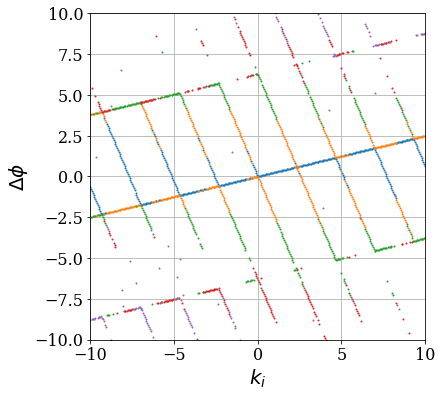

In [7]:
%pylab inline
figsize(6,6)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

for i in range(_n_b):
    plot(_k_i_vec, np.real(_Del_phi_i_vec[i]), 'o', markersize=1)
    
    #plot(_k_i_vec, np.real(_Omega_i_vec[i]), 'o', markersize=1)
    
    ## manual rotation
    #plot(_k_i_vec*np.cos(_theta)+np.real(_Omega_i_vec[i])*np.sin(_theta), np.real(_Omega_i_vec[i])*np.cos(_theta)-_k_i_vec*np.sin(_theta), 'o', markersize=1)
xlim(-10, 10)
ylim(-10, 10)
grid()
xlabel(r"$k_i$", fontsize=20)
ylabel(r"$\Delta\phi$", fontsize=20)


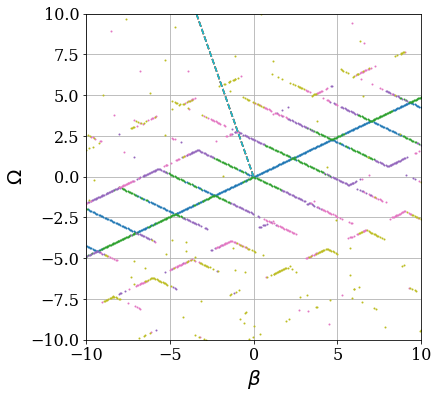

In [11]:
## _Omega*_T_per - _Beta*_Z_per = Del_phi
## _Omega*_Z_per + _Beta*_T_per = (c_1*_Z_per+_T_per)*k_i

## _Omega = (Del_phi*_T_per + (_c_1*_Z_per+_T_per)*k_i*_Z_per)/(_T_per**2 + _Z_per**2)
## _Beta = (-Del_phi*_Z_per + (_c_1*_Z_per+_T_per)*k_i*_T_per)/(_T_per**2 + _Z_per**2)

##--- new
## _Omega*_T_p - _Beta*_Z_p = Del_phi
## _Omega*_T_o + _Beta*_Z_o = (_Z_o + c_1*_T_o)*k_i

## _Omega = (Del_phi*_Z_o + (_Z_o + _c_1*_T_o)*k_i*_Z_p)/(_T_p*_Z_o + _Z_p*_T_o)
## _Beta= (-Del_phi*_T_o + (_Z_o + _c_1*_T_o)*k_i*_T_p)/(_T_p*_Z_o + _Z_p*_T_o)



for i in range(_n_b):
    #_Omega_i_vec = (_Del_phi_i_vec[i]*_T_per + (_c_1*_Z_per+_T_per)*_k_i_vec*_Z_per)/(_T_per**2 + _Z_per**2)
    #_Beta_i_vec = (-_Del_phi_i_vec[i]*_Z_per + (_c_1*_Z_per+_T_per)*_k_i_vec*_T_per)/(_T_per**2 + _Z_per**2)

    _Omega_i_vec = (_Del_phi_i_vec[i]*_Z_o + (_Z_o + _c_1*_T_o)*_k_i_vec*_Z_p)/(_T_p*_Z_o + _Z_p*_T_o)
    _Beta_i_vec = (-_Del_phi_i_vec[i]*_T_o + (_Z_o + _c_1*_T_o)*_k_i_vec*_T_p)/(_T_p*_Z_o + _Z_p*_T_o)

    plot(np.real(_Beta_i_vec), np.real(_Omega_i_vec), 'o', markersize=1)
    #plot(-2.0*np.pi/np.sqrt(_T_per**2+_Z_per**2)*np.sin(_theta), 2.0*np.pi/np.sqrt(_T_per**2+_Z_per**2)*np.cos(_theta), 'o', markersize=3)
    
    plot(-2.0*np.pi/_T_o, np.real(_Omega_i_vec), 'o', markersize=1)
    
    
    plot([0, -10.0*np.sin(_theta)], [0, 10], linestyle='--')
    
xlim(-10, 10)
ylim(-10, 10)
grid()
xlabel(r"$\beta$", fontsize=20)
ylabel(r"$\Omega$", fontsize=20)

